In [31]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import model_selection
from mpl_toolkits import mplot3d
#import pandas as pd 
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

## Data preparation

In [32]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [95]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [96]:
filter_ = (target == 1) | (target == 7)  #filter out those with label 1 or 7

In [97]:
#filtered data, images and targets
data = data[filter_]
images = images[filter_]
target = target[filter_]

In [37]:
X_train , X_test , y_train , y_test = model_selection.train_test_split(data, target, test_size = 0.4 , random_state = 0)

<span style="color:green; font-weight: bold">Comment: Would be better to write a function "data_preparation" like sample solution to preprocess the "digits" data since repeatedly using this data set. </span>

## QDA

### Implement QDA Training

In [38]:
def fit_qda(training_features, training_labels):
    training_features_0, training_features_1 = training_features[training_labels==0], training_features[training_labels==1]    
    mu = np.vstack((np.mean(training_features_0, axis=0), np.mean(training_features_1, axis=0)))
    covmat = np.concatenate((np.cov(training_features_0, rowvar=False, bias=True)[None], np.cov(training_features_1, rowvar=False, bias=True)[None]), axis=0)
    p = np.array([np.mean(training_labels == 0), np.mean(training_labels == 1)])
    return mu, covmat, p 

In [39]:
labels_train = y_train.copy() 

In [40]:
labels_train[labels_train==1] = 0 
labels_train[labels_train==7] = 1  

In [41]:
mean, covariance_matrix, prior = fit_qda(X_train, labels_train)
mean = mean.reshape((2,64))
covariance_matrix.shape

(2, 64, 64)

<span style="color:green; font-weight: bold">
Comment :<br>Essentially same with sample solution. </span>

### Ones

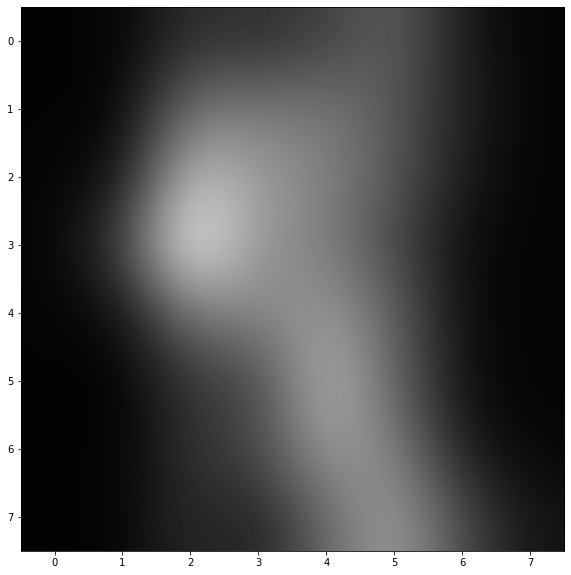

In [94]:


img = np.random.multivariate_normal(mean[0,:], covariance_matrix[0]).reshape((8,8))
plt.plot()
plt.gray()
plt.imshow(img ,interpolation = "bicubic") # Possible interpolations =" bicubic", "nearest"
    
plt.show()


Now this, depending on the random outcome, can be a bit blurry. However, the images get better when you plot them smaller, as you can abstract away more from the blur and noise.

<span style="color:green; font-weight: bold">
Comment : Nice comment! </span>

In [86]:

for i in range(8):
    img = np.random.multivariate_normal(mean[0,:], covariance_matrix[0]).reshape((8,8))
    plt.subplot(241+i)
    plt.gray()
    plt.imshow(img ,interpolation = "bicubic") # Possible interpolations =" bicubic", "nearest"
    
plt.show()


The program can generate 8x8 images of ones, which, using bicubic interpolation are in most cases distinguishable from other numbers.

<span style="color:green; font-weight: bold">
Comment : Better if you can remove the ticks of x-axis and y-axis, because they makes no sense, you can use the "plt.tick_params" just as sample solution does. </span>

### Sevens

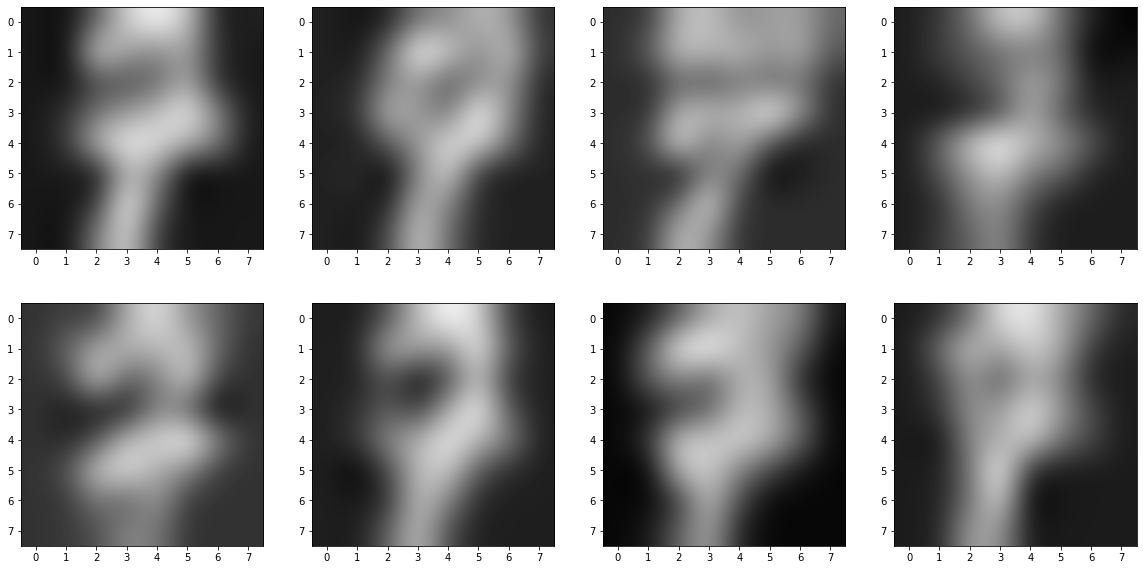

In [85]:

for i in range(8):
    img = np.random.multivariate_normal(mean[1,:], covariance_matrix[1]).reshape((8,8))
    plt.subplot(241+i)
    plt.gray()
    plt.imshow(img ,interpolation = "bicubic") # Possible interpolations =" bicubic", "nearest"
    
plt.show()


We can see that using the bicubic interpolation, the sevens are blurred and noisy, but distinguishable better than ones, mainly due to the slash in the middle (which is not present in the American sevens).

### Quiz: Can you identify the numbers?

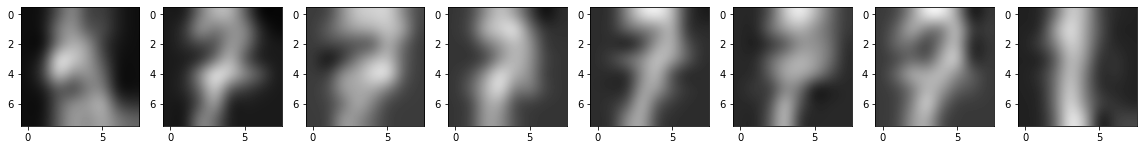

array([1, 7, 7, 7, 7, 7, 7, 1])

In [84]:
a = np.random.randint(2,size = 8)
for i in range(8):
    img = np.random.multivariate_normal(mean[a[i],:], covariance_matrix[a[i]]).reshape((8,8))
    plt.subplot(281+i)
    plt.gray()
    plt.imshow(img ,interpolation = "bicubic") # Possible interpolations =" bicubic", "nearest"
    
plt.show()
a*6+1

The two quiz participants which I asked were able to distinguish the sevens and ones in all cases, mostly thanks to the slash in the sevens. At first it took them a while, but as they got used to the blur and noise they got quicker.

All in all, when distinguishing only between two digits, this method is sufficient. However when using all 10 digits, this would be much harder. 
I think QDA data generation is not really well suited for this problem, as the data does not form elliptic clusters. We can see that by looking at the solution of last weeks problem- we used PCA for the dimension reduction, which is supposed to be a top notch technique. After that, we got two well separated clusters, but their shape wasn't elliptic. The QDA however generates elliptically (Gaussian) distributed data, so it can easily make a pretty weird digit. To improve, I would use a technique that could represent the cluster shape better.

<span style="color:green; font-weight: bold">
Comment : Interesting quiz and great comment!!! Well done! </span>